In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/SKawsar/Data_Visualization_with_Python/main/skoda.csv")

In [3]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [4]:

model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

In [5]:
# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
# year_coun

In [54]:
def barplot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # write a title for your plot
    plt.title("Number of cars present for each " + column_x)
    
    # write proper lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

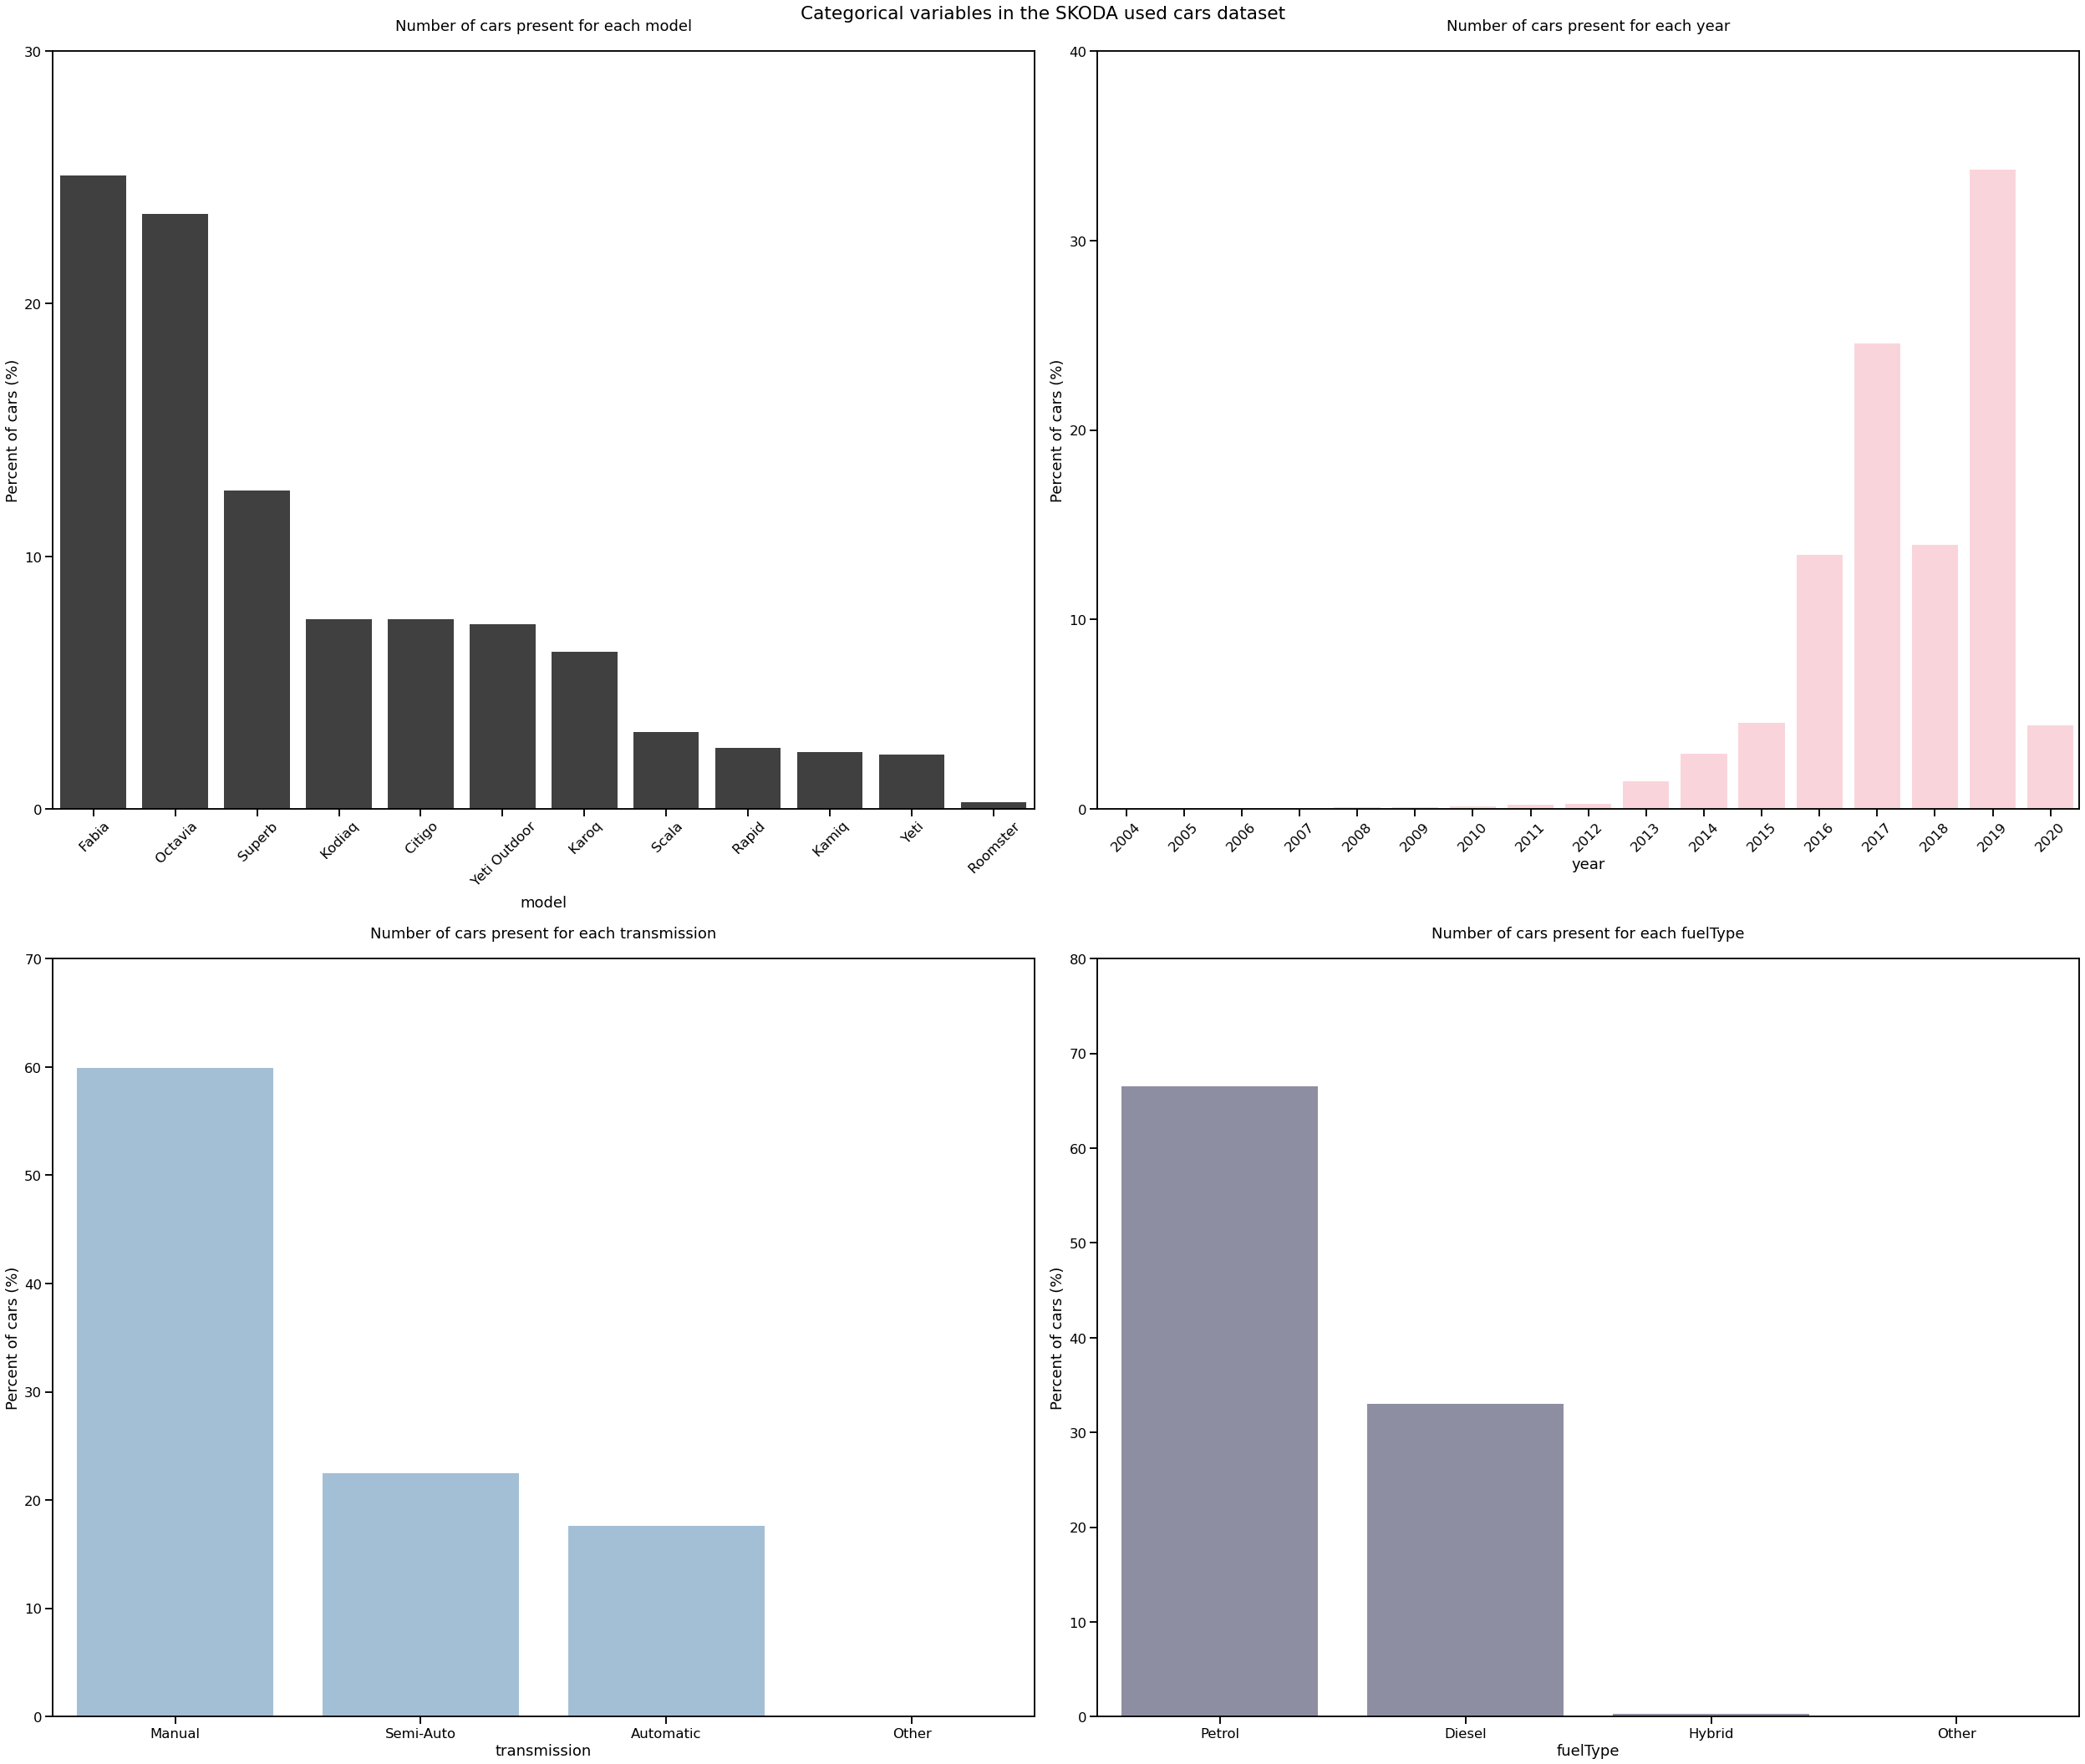

In [73]:
sns.set_context('talk')

plt.figure(figsize=(35,30))

# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'black', 45, np.arange(0,31,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'pink', 45, np.arange(0,41,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', '#7aabd4', 0, np.arange(0,71,10))

# row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', '#646489', 0, np.arange(0,81,10))

# write the title for all the plots
plt.suptitle("Categorical variables in the SKODA used cars dataset")

# keep the individual plots separate from each other
plt.tight_layout()
# display the plots
plt.show()